In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
# to connectto Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from numpy import load
from numpy import save
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sb
from collections import Counter
import time
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator


In [4]:
#Funcion para graficar en 2D y 3D
def plot_2d(component1, component2):
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=False,
            line_width=1,
        
        )
    ))
    fig.update_layout(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    margin=dict( l=100,r=100,b=100,t=100))                 
    fig.layout.template = 'seaborn'
    fig.show()

def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(scene = dict(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    zaxis_title='Componente 3'),
                    margin=dict(l=25,r=25,b=25,t=25))
    fig.layout.template = 'seaborn'
    
    fig.show()

In [5]:
## Cargando cvs
path = "/content/drive/MyDrive/CURSOS UNSA/Proyecto final de tesis/Avances Proyecto/Tesis_code/"

In [6]:
## defining constants
PATH = path+"india_2015_2020.csv"

dataset = pd.read_csv(PATH)
df = dataset.copy()

In [7]:
#Generando 
X_data = df.drop(columns=['City','AQI','AQI_Bucket','AQI','AQI_range'], inplace=False)
X_data.set_index('Date', inplace=True)


Y_labels = df.drop(columns=['Date','City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI'], inplace=False)

In [74]:
X_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
Date,,,,,,,,,
2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68
2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97
2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71
2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36
2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20
...,...,...,...,...,...,...,...,...,...
2020-07-01,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40
2020-07-01,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48
2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15


In [9]:
Y_labels.value_counts()

AQI_Bucket  AQI_range
yellow      1            5960
orange      2            5946
red         3            1494
green       0            1170
purple      4             910
maroon      5             312
dtype: int64

In [10]:
# Dividiendo los datos y etiquetas
labels = Y_labels.loc[:,'AQI_Bucket'].values
data = X_data.loc[:,'PM2.5':].values

In [11]:
data.shape

(15792, 9)

In [12]:
# load components to PCA.ipynb
principalComponents = load(path+'pca_3.npy')
# print the array
print(principalComponents)

[[ 0.57951129 -0.13008156  0.11348745]
 [ 0.26889945 -0.09788502 -0.02759999]
 [ 0.12935637 -0.03449252 -0.2083159 ]
 ...
 [-0.1577603   0.00723817  0.01586001]
 [-0.06262855  0.08782517  0.01812965]
 [-0.12466779 -0.02357258 -0.02768272]]


# Kmeans with PCA

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Obtener el valor K adecuado

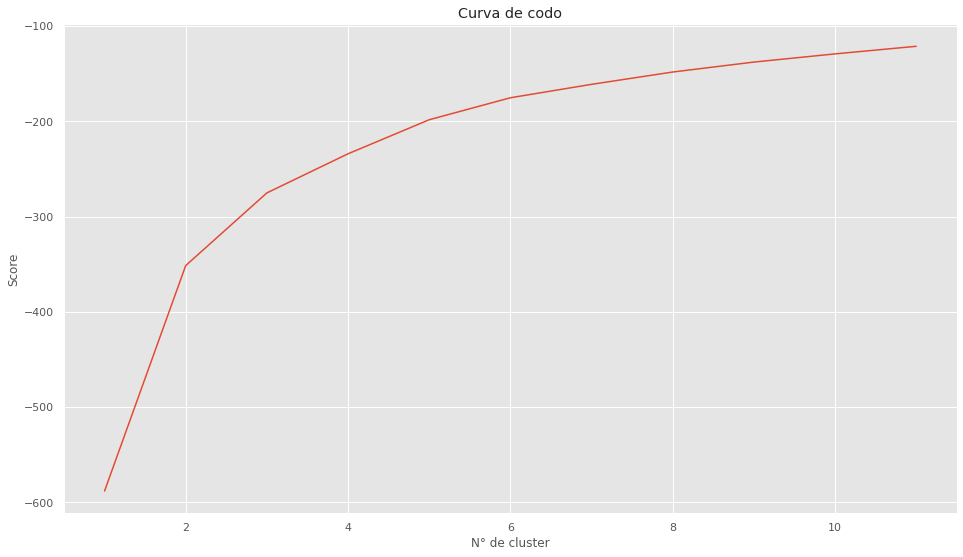

In [96]:
Nc = range(1, 12)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score1 = [kmeans[i].fit(principalComponents).score(principalComponents) for i in range(len(kmeans))]
score1
plt.plot(Nc,score1)
plt.xlabel('N° de cluster')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

Ejecutamos el algoritmo para 5 clusters y obtenemos los centroids.

In [97]:
kmeans_pca = KMeans(n_clusters=5).fit(principalComponents)
centroids = kmeans_pca.cluster_centers_
centroids

array([[-0.0037539 ,  0.08952781,  0.01988088],
       [ 0.48420112, -0.01819938, -0.00405086],
       [ 0.14595317, -0.00856873, -0.04266086],
       [ 0.02558754, -0.10684077,  0.13206972],
       [-0.10193423, -0.02027814, -0.01631824]])

In [98]:
# Predecir los clústeres
labels = kmeans_pca.predict(principalComponents)
# Conseguir los centros de clúster
C = kmeans_pca.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [101]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
    x=principalComponents[:, 0],
    y=principalComponents[:, 1],
    z=principalComponents[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=asignar,                
        colorscale='Rainbow',   
        opacity=.2,
        ),
        name="Datos"
    )    
)
fig.add_trace(
    go.Scatter3d(
    x=C[:, 0],
    y=C[:, 1],
    z=C[:, 2],
    mode='markers',
    marker=dict(
        symbol='x',
        size=6,
        color=colores,                
        colorscale='Rainbow',   
        opacity=1,
        line_width=3),
    name="Centroides"
    )
)

# tight layout
fig.update_layout(scene = dict(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    zaxis_title='Componente 3'),margin=dict(l=50,r=50,b=50,t=50))
fig.layout.template = 'seaborn'
fig.show()

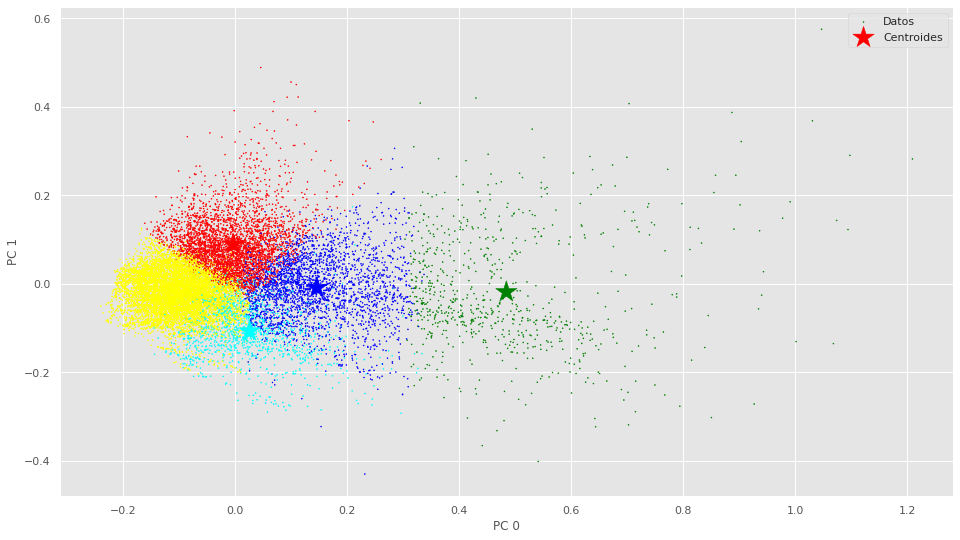

In [102]:
# Componente 0 y 1
f1 = principalComponents[:, 0]
f2 = principalComponents[:, 1]

plt.scatter(f1, f2, c=asignar, s=1,label="Datos")
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=500,label="Centroides")
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.legend()
plt.show()

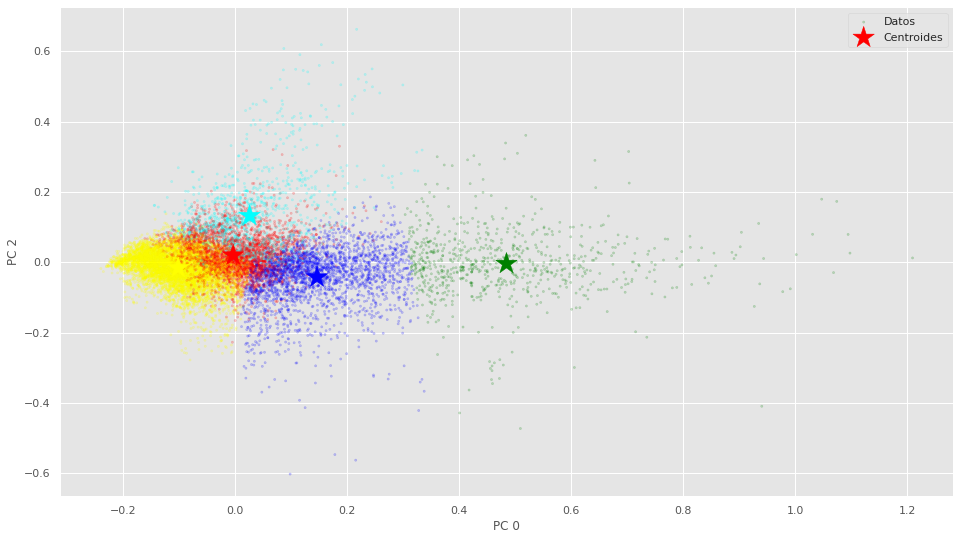

In [103]:
# Componente 0 y 2
f1 = principalComponents[:, 0]
f2 = principalComponents[:, 2]

plt.scatter(f1, f2, c=asignar, s=5,alpha=0.2,label="Datos")
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=500, label = "Centroides")
plt.xlabel('PC 0')
plt.ylabel('PC 2')
plt.legend()
plt.show()

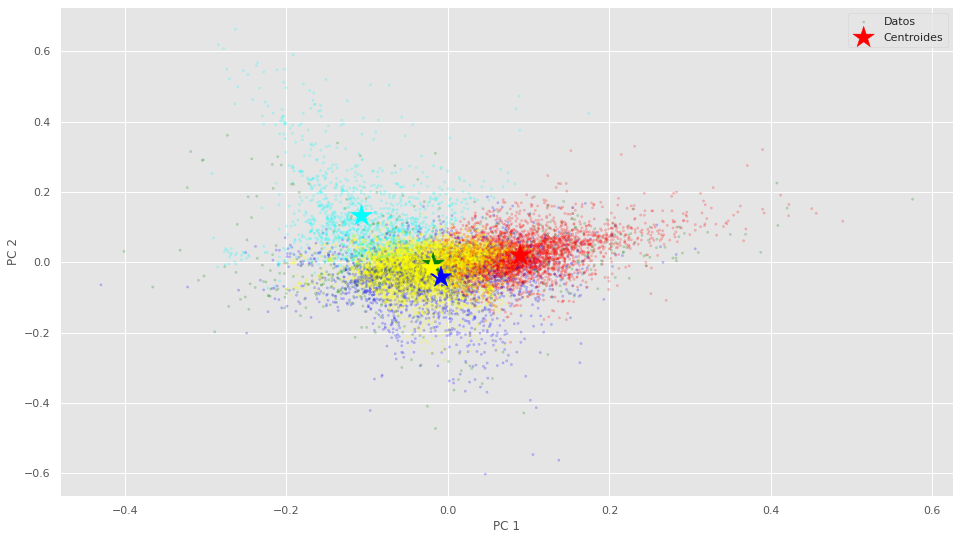

In [104]:
# Componente 1 y 2
f1 = principalComponents[:, 1]
f2 = principalComponents[:, 2]

plt.scatter(f1, f2, c=asignar, s=5,alpha=0.2,label="Datos")
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=500, label="Centroides")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [105]:
y_ =  pd.DataFrame()
y_['AQI_Bucket'] = Y_labels['AQI_Bucket'].map({'green':0,
                             'yellow':1,
                             'orange':2,
                            'red':3,
                            'purple':4,
                            'maroon':5,
                             },
                             na_action=None)

In [106]:
copy =  pd.DataFrame()
copy['usuario']=X_data.index
copy['categoria']=y_.values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,3610
1,green,760
2,blue,2626
3,cyan,1257
4,yellow,7539


In [109]:
group_referrer_index = copy['label'] ==4
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,1159
1,1,4776
2,2,1530
3,3,68
4,4,5
5,5,1


In [110]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans_pca.cluster_centers_, principalComponents)
closest

array([ 8428,  6085, 11655,  8107,  5708])

In [111]:
users=df['City'].values
index=df.index
for row in closest:
    print(users[row]+'---> Posición:'+ str(index[row]))

Jaipur---> Posición:8428
Delhi---> Posición:6085
Kolkata---> Posición:11655
Talcher---> Posición:8107
Amritsar---> Posición:5708


In [112]:
print(str(principalComponents[500])+" - "+Y_labels['AQI_Bucket'][500])

[ 0.0209231  -0.07455683  0.00799942] - orange


In [113]:
X_new = np.array([[-0.17729536 , 1.33841432, -0.68205456]]) 

new_labels = kmeans_pca.predict(X_new)
print(colores[int(new_labels)])

red


# Clustering Jerárquico Aglomerante - PCA

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



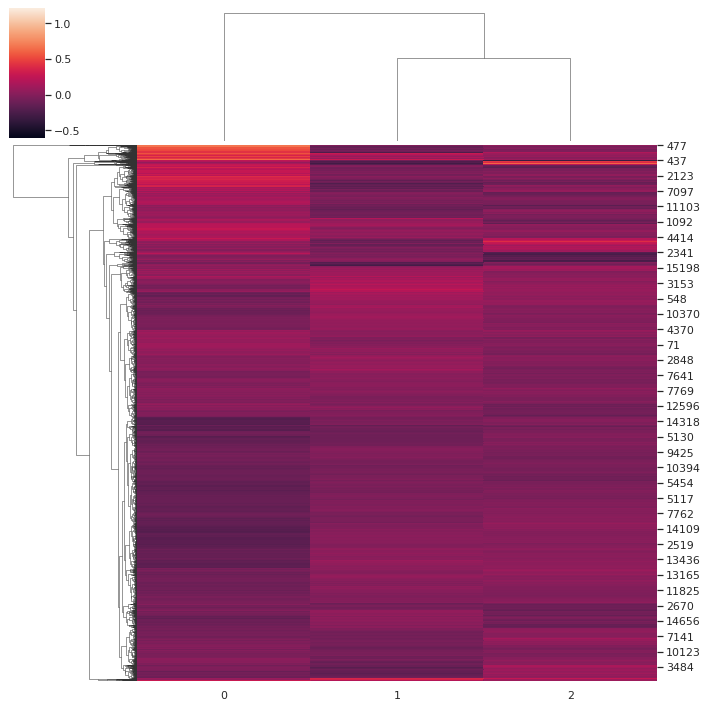

In [28]:
#dendograma
sb.set(style="darkgrid")
sb.clustermap(principalComponents)

Es una aproximación de abajo hacia arriba (bottom-up) donde se dividen los clusters en subclusters y así sucesivamente. Iniciando asignando cada muestra simple a un cluster y en cada iteración sucesiva va aglomerando (mezclando) el par de closters más cercanos satisfaciendo algún criterio de similaridad, hasta que todos los elementos pertenecen a un solo cluster.

El proceso de cluster aglomerante es el siguiente:

--> Primero asigna cada elemento a un cluster

--> Después encuentra la matriz de distancias

--> Encuentra 2 clusters que tengan la distancia más corta y los mezcla

--> Continua este proceso hasta que se forma un solo cluster grande

In [29]:
X = principalComponents[:,[0,1]]

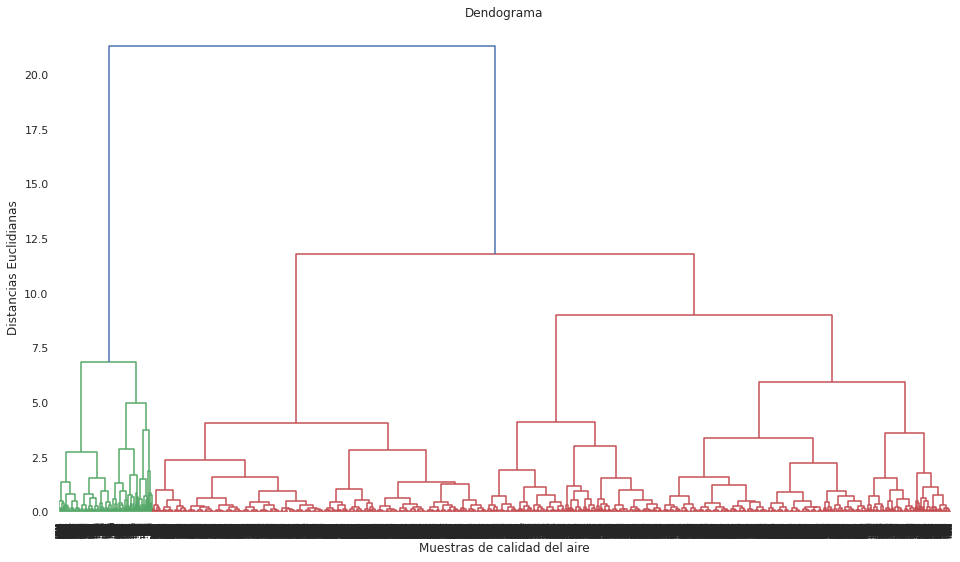

In [30]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Muestras de calidad del aire')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [31]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

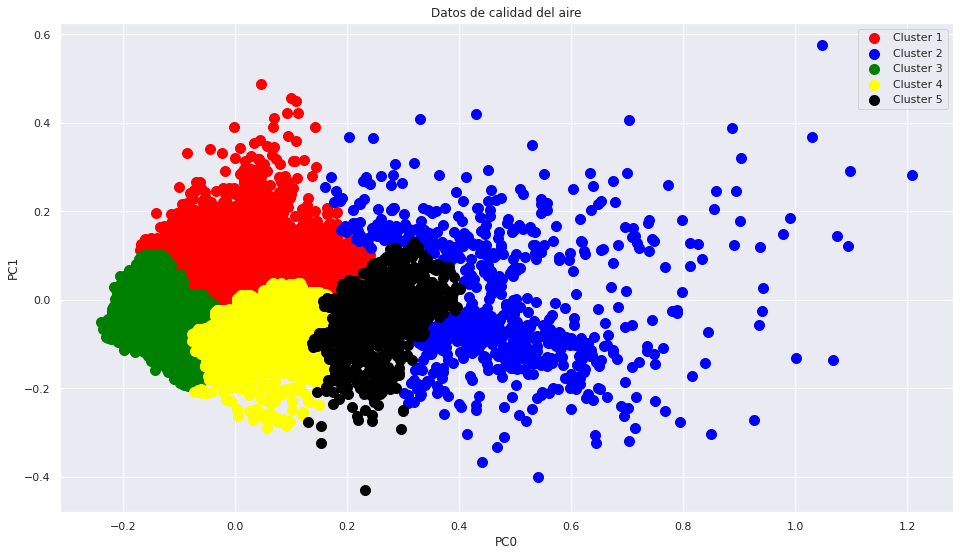

In [32]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.title('Datos de calidad del aire')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()

# KMEANS - Sin reducción(PCA)

In [114]:
# X_data
df_norm = X_data.copy()
df_norm = (X_data-X_data.min())/(X_data.max()-X_data.min())
df_norm

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
Date,,,,,,,,,
2015-01-01,0.360461,0.662941,0.176961,0.153334,0.292380,0.163376,0.499343,0.060321,0.161687
2015-01-02,0.214185,0.293899,0.158863,0.138498,0.233027,0.153623,0.313403,0.043348,0.116250
2015-01-03,0.100196,0.143798,0.065788,0.127708,0.126771,0.335731,0.348555,0.017235,0.076440
2015-01-04,0.174646,0.263682,0.063945,0.155526,0.128543,0.629315,0.379106,0.030161,0.098363
2015-01-05,0.168613,0.238918,0.035787,0.147138,0.101126,0.593202,0.302234,0.021674,0.089981
...,...,...,...,...,...,...,...,...,...
2020-07-01,0.019965,0.033204,0.010035,0.055804,0.039208,0.035775,0.017740,0.043413,0.059716
2020-07-01,0.066218,0.110092,0.083911,0.063643,0.079843,0.085550,0.019382,0.022653,0.063907
2020-07-01,0.025147,0.037043,0.003763,0.040757,0.016920,0.040747,0.019382,0.070962,0.113068


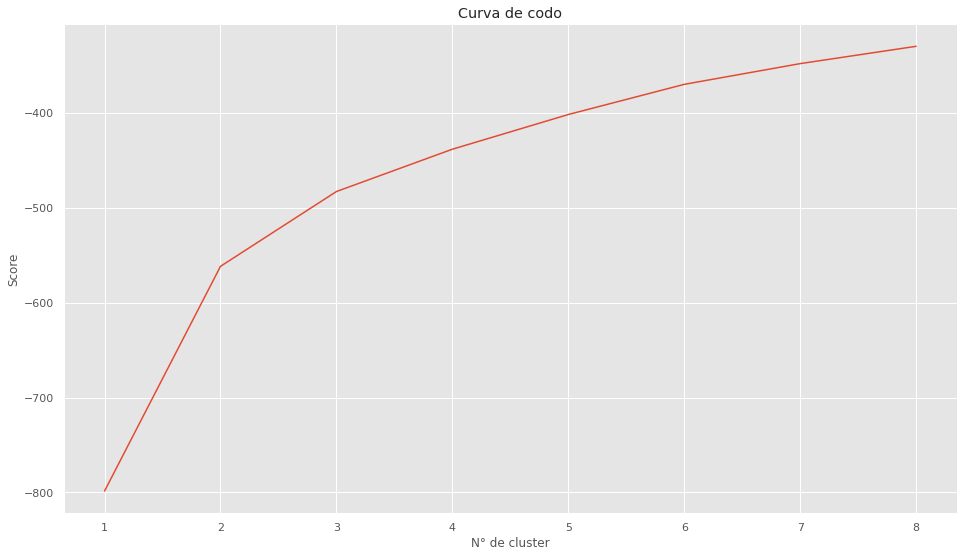

In [123]:
Nc = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score2 = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]
score2
plt.plot(Nc,score2)
plt.xlabel('N° de cluster')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

In [124]:
clustering = KMeans(n_clusters=6,max_iter=300).fit(df_norm)
centroids = clustering.cluster_centers_

In [125]:
centroids.shape

(6, 9)

# Cluster Jerárquico sin PCA

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



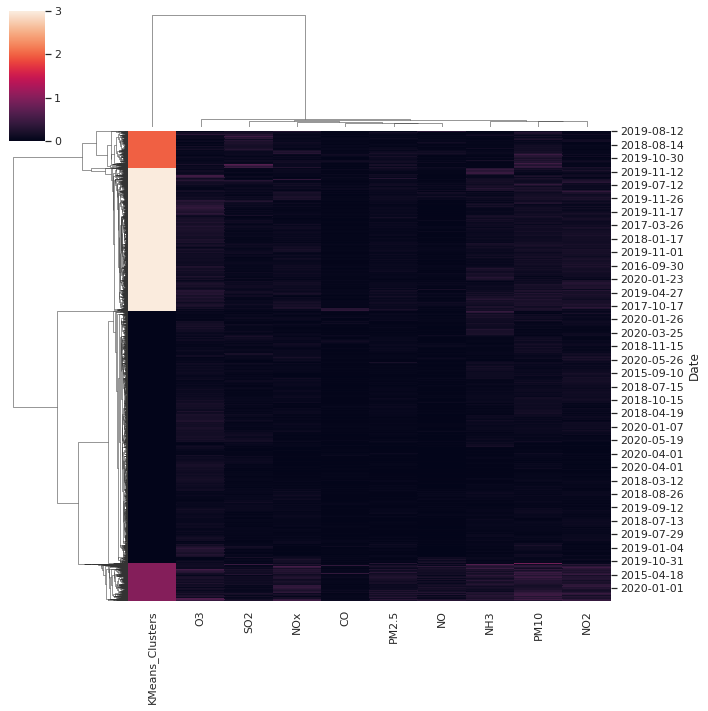

In [66]:
#dendograma
sb.set(style="darkgrid")
sb.clustermap(df_norm)

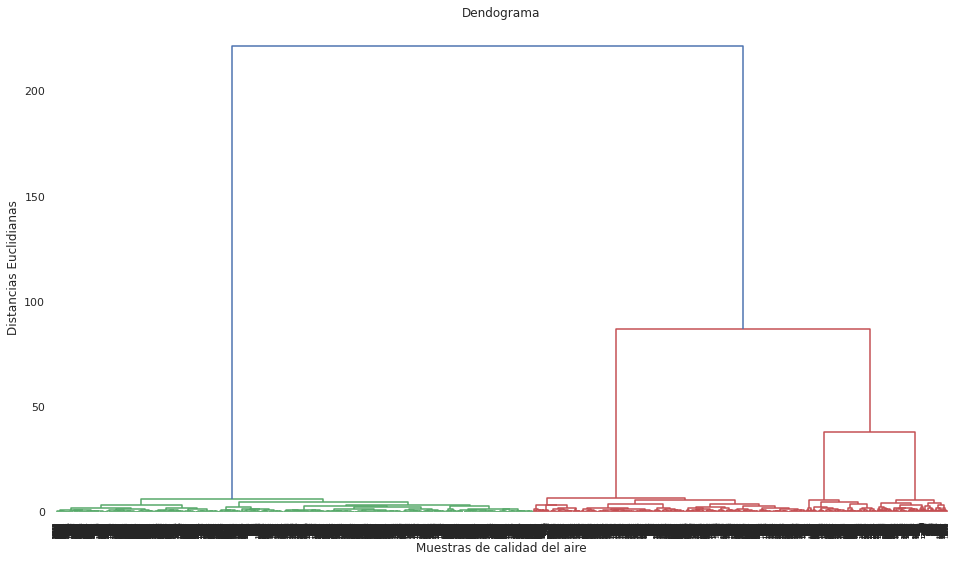

In [67]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Muestras de calidad del aire')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [68]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(df_norm)

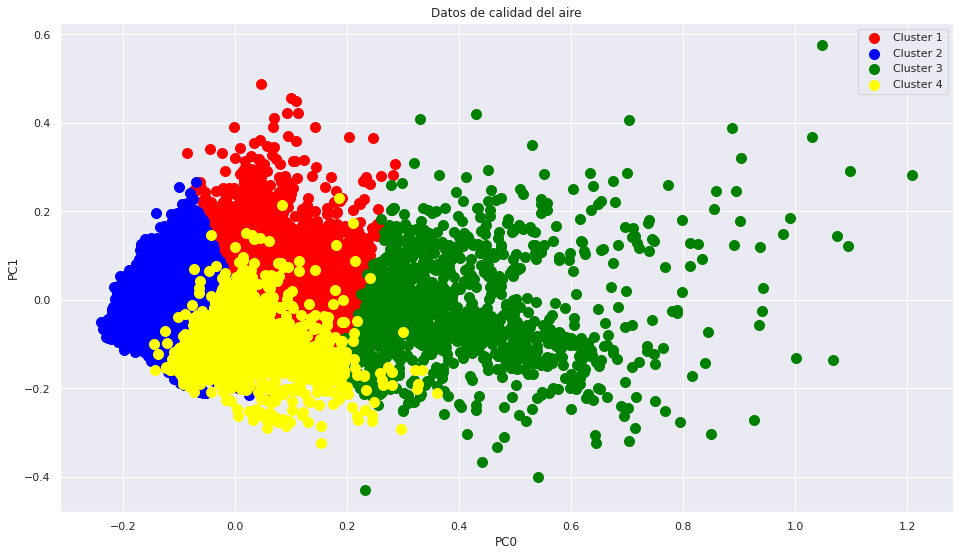

In [69]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.title('Datos de calidad del aire')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()